In [154]:
import pandas as pd
import numpy as np
import re
from sklearn.cross_validation import train_test_split

In [2]:
df = pd.read_csv('train_transaction.csv')

In [3]:
df_id = pd.read_csv('train_identity.csv')

In [4]:
df = pd.merge(df, df_id, how='left', on='TransactionID')

In [6]:
df_dtypes = df.dtypes

In [15]:
df_cols = df.columns

In [26]:
df2 = df

In [102]:
df2 = df
for a,b in zip(df_dtypes, df_cols):
    if a=='object':
        cnt = len(df.groupby(b).TransactionID.count())
        if cnt < 10:
            print(b, cnt)
            df2 = pd.concat([df2, pd.get_dummies(df[b], prefix='pre_'+b)], axis=1)
    

ProductCD 5
card4 4
card6 4
M1 2
M2 2
M3 2
M4 3
M5 2
M6 2
M7 2
M8 2
M9 2
id_12 2
id_15 3
id_16 2
id_23 3
id_27 2
id_28 2
id_29 2
id_34 4
id_35 2
id_36 2
id_37 2
id_38 2
DeviceType 2


In [ ]:
for a in 

In [103]:

for a,b in zip(df_dtypes, df_cols):
    if a=='object':
        cnt = len(df.groupby(b).TransactionID.count())
        if cnt >= 10:
            print(b, cnt)
            
    

P_emaildomain 59
R_emaildomain 60
id_30 75
id_31 130
id_33 260
DeviceInfo 1786


In [55]:
email_assignments = list(df.assign(email_domain2=df.P_emaildomain.apply(lambda x: str(x).split('.')[0]))  \
          .groupby('email_domain2').isFraud.agg([np.mean, len]).sort_values('len', ascending=False).query('len>1000').head(10).index)
          

In [105]:
df2['filtered_email'] = df2.P_emaildomain.apply(lambda x: str(x).split('.')[0])
df2['filtered_email_R'] = df2.R_emaildomain.apply(lambda x: str(x).split('.')[0])

In [106]:
for col in email_assignments:
    df2['pre_p_email_'+col] = df2['filtered_email']==col

In [57]:
email_assignments_R = list(df.assign(email_domain2=df.R_emaildomain.apply(lambda x: str(x).split('.')[0]))  \
          .groupby('email_domain2').isFraud.agg([np.mean, len]).sort_values('len', ascending=False).query('len>1000').head(10).index)
          

In [145]:
for col in email_assignments_R:
    df2['pre_r_email_'+col] = (df2['filtered_email_R']==col).astype(int)

In [108]:
df2 = df2.assign(OS=df2.id_30.apply(lambda x: str(x).split(' ')[0]))

In [109]:
df2 = pd.concat([df2, pd.get_dummies(df2['OS'], prefix='pre_id30')], axis=1)

In [110]:
df2 = df2.assign(clean_id31=df2.id_31.apply(lambda x: re.split('/| ', str(x))[0]))

In [114]:
id31_cols = df2.groupby('clean_id31').isFraud.agg([np.mean, len]).query('len>1000').index

In [146]:
for col in id31_cols:
    df['pre_id31_'+col] = (df2['clean_id31']==col).astype(int)

In [130]:
def getFromArray(arr, index):
    try:
        return(arr[index])
    except:
        return(np.nan)

In [131]:
df2['pre_width']=df2['id_33'].apply(lambda x: np.float(str(x).split('x')[0]))
df2['pre_height']=df2['id_33'].apply(lambda x: np.float(getFromArray(str(x).split('x'),1)))

In [142]:
df2 = df2.assign(deviceCleaner = df2.DeviceInfo.apply(lambda x: re.split(':| | -', str(x))[0]))
df2['deviceCleaner'] = ['SAMSUNG' if a[0:2]=='SM' else a for a in df2['deviceCleaner']]
df2['deviceCleaner'] = ['LG' if a[0:2]=='LG' else a for a in df2['deviceCleaner']]

In [144]:
devices = df2.groupby('deviceCleaner').isFraud.agg([len, np.mean]).filter('len>100').index

In [147]:
for col in devices:
    df2['pre_device_'+col] = (df2['deviceCleaner']==col).astype(int)

In [149]:
df2.assign(tng=df2.TransactionAmt==99).groupby('tng').isFraud.agg([len, np.mean])

,len,mean
tng,,
False,590488,0.034991
True,52,0.019231


In [150]:
df2['is_transaction_hr'] = df2['TransactionDT'].apply(lambda x: ((x/60/60/24) - np.floor(x/60/60/24))*24)

In [151]:
#Column Selection
def colSelect(cols):
    output = []
    for col in cols:
        if col in ['isFraud', 'DeviceType', 'DeviceInfo']:
            output.append(False)
        elif col[0]=='C':
            output.append(True)
        elif col[0]=='V':
            output.append(True)
        elif col[0]=='D':
            output.append(True)
        elif col in ['has_r', 'different_r', 'dist1', 'dist2', 'card1', 'card2', 'card3', 'card5', 'TransactionAmt']:
            output.append(True)
        elif col[0:2]=='is':
            output.append(True)
        elif col[0:3]=='pre':
            output.append(True)
        elif col[0:4]=='id_0':
            output.append(True)
        elif col[0:4] in ['id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22']:
            output.append(True)
        else:
            output.append(False)
    return(output)

In [152]:
cols = df2.columns[colSelect(df2.columns)]

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'dist1', 'dist2',
       'C1', 'C2', 'C3',
       ...
       'pre_device_verykoolS5524', 'pre_device_verykoolS5525',
       'pre_device_verykoolS5530', 'pre_device_verykools4009',
       'pre_device_verykools5004', 'pre_device_verykools5034',
       'pre_device_verykools5035', 'pre_device_vivo',
       'pre_device_xs-Z47b7VqTMxs', 'is_transaction_hr'],
      dtype='object', length=1191)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(df2[cols], df2['isFraud'], test_size=0.15, random_state=42)

In [156]:
from xgboost import XGBClassifier

In [163]:
from xgboost.sklearn import XGBClassifier

In [161]:
xgb_dart = XGBClassifier(n_estimators=350,
                        max_depth=8,
                        subsample=.95,
                        colsample_bytree=.9,
                        reg_alpha=0,
                        reg_lambda=1,
                        booster='dart',
                        rate_drop=.01)

In [164]:
xgb_dart.fit(X_train, 
             y_train, 
             eval_set=[( X_train, y_train), ( X_test, y_test)],
             eval_metric='auc',
            early_stopping_rounds=10,
            verbose=True)

[0]	validation_0-auc:0.795146	validation_1-auc:0.795319
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.819027	validation_1-auc:0.821001
[2]	validation_0-auc:0.822043	validation_1-auc:0.812099
[3]	validation_0-auc:0.823722	validation_1-auc:0.82619
[4]	validation_0-auc:0.831243	validation_1-auc:0.833098
[5]	validation_0-auc:0.852423	validation_1-auc:0.856265
[6]	validation_0-auc:0.854204	validation_1-auc:0.857189
[7]	validation_0-auc:0.855476	validation_1-auc:0.858288
[8]	validation_0-auc:0.855836	validation_1-auc:0.859102
[9]	validation_0-auc:0.863444	validation_1-auc:0.867678
[10]	validation_0-auc:0.867938	validation_1-auc:0.871201
[11]	validation_0-auc:0.87099	validation_1-auc:0.874753
[12]	validation_0-auc:0.872598	validation_1-auc:0.87547
[13]	validation_0-auc:0.87421	validation_1-auc:0.876568
[14]	validation_0-auc:0.875173	validation_1-auc:0.877308
[1

[141]	validation_0-auc:0.961806	validation_1-auc:0.945608
[142]	validation_0-auc:0.96308	validation_1-auc:0.946069
[143]	validation_0-auc:0.962179	validation_1-auc:0.945594
[144]	validation_0-auc:0.962171	validation_1-auc:0.945707
[145]	validation_0-auc:0.962449	validation_1-auc:0.945835
[146]	validation_0-auc:0.962228	validation_1-auc:0.946175
[147]	validation_0-auc:0.9625	validation_1-auc:0.946013
[148]	validation_0-auc:0.962514	validation_1-auc:0.946014
[149]	validation_0-auc:0.962443	validation_1-auc:0.946207
[150]	validation_0-auc:0.963054	validation_1-auc:0.946621
[151]	validation_0-auc:0.963445	validation_1-auc:0.94674
[152]	validation_0-auc:0.963827	validation_1-auc:0.946793
[153]	validation_0-auc:0.963465	validation_1-auc:0.946606
[154]	validation_0-auc:0.963848	validation_1-auc:0.947033
[155]	validation_0-auc:0.963833	validation_1-auc:0.947151
[156]	validation_0-auc:0.963917	validation_1-auc:0.947543
[157]	validation_0-auc:0.963941	validation_1-auc:0.947436
[158]	validation_0

[283]	validation_0-auc:0.973274	validation_1-auc:0.954013
[284]	validation_0-auc:0.973116	validation_1-auc:0.954264
[285]	validation_0-auc:0.973278	validation_1-auc:0.954696
[286]	validation_0-auc:0.973502	validation_1-auc:0.954571
[287]	validation_0-auc:0.973266	validation_1-auc:0.954341
[288]	validation_0-auc:0.973632	validation_1-auc:0.954228
[289]	validation_0-auc:0.973485	validation_1-auc:0.954336
[290]	validation_0-auc:0.973294	validation_1-auc:0.954456
[291]	validation_0-auc:0.97382	validation_1-auc:0.954453
[292]	validation_0-auc:0.973516	validation_1-auc:0.954422
[293]	validation_0-auc:0.973647	validation_1-auc:0.954489
[294]	validation_0-auc:0.973637	validation_1-auc:0.95435
[295]	validation_0-auc:0.973804	validation_1-auc:0.954645
Stopping. Best iteration:
[285]	validation_0-auc:0.973278	validation_1-auc:0.954696



XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=350, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       rate_drop=0.01, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.95, verbosity=1)

In [166]:
df2['preds'] = xgb_dart.predict_proba(df2[cols])[:, 1]

In [168]:
from sklearn.metrics import auc, roc_curve

In [169]:
fpr, tpr, thresholds= roc_curve(df2['isFraud'], df2['preds'])

In [191]:
fpr2, tpr2, thresholds= roc_curve(df['isFraud'], df['preds2'])

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

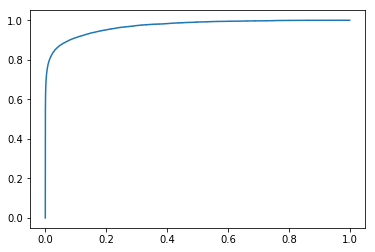

In [172]:
plt.plot(fpr, tpr)

In [173]:
auc(fpr, tpr)

0.9704806626266985

In [174]:
test = pd.read_csv('test_transaction.csv')

In [175]:
test_id = pd.read_csv('test_identity.csv')

In [176]:
test = pd.merge(test, test_id, how='left', on='TransactionID')

In [177]:
for a,b in zip(df_dtypes, df_cols):
    if a=='object':
        cnt = len(df.groupby(b).TransactionID.count())
        if cnt < 10:
            print(b, cnt)
            test = pd.concat([test, pd.get_dummies(test[b], prefix='pre_'+b)], axis=1)

ProductCD 5
card4 4
card6 4
M1 2
M2 2
M3 2
M4 3
M5 2
M6 2
M7 2
M8 2
M9 2
id_12 2
id_15 3
id_16 2
id_23 3
id_27 2
id_28 2
id_29 2
id_34 4
id_35 2
id_36 2
id_37 2
id_38 2
DeviceType 2


In [178]:
test['filtered_email'] = test.P_emaildomain.apply(lambda x: str(x).split('.')[0])
test['filtered_email_R'] = test.R_emaildomain.apply(lambda x: str(x).split('.')[0])

In [179]:
for col in email_assignments:
    test['pre_p_email_'+col] = test['filtered_email']==col

In [180]:
for col in email_assignments_R:
    test['pre_r_email_'+col] = (test['filtered_email_R']==col).astype(int)

In [181]:
test = test.assign(OS=test.id_30.apply(lambda x: str(x).split(' ')[0]))

In [182]:
test = pd.concat([test, pd.get_dummies(test['OS'], prefix='pre_id30')], axis=1)

In [183]:
test = test.assign(clean_id31=test.id_31.apply(lambda x: re.split('/| ', str(x))[0]))

In [185]:
test['pre_width']=test['id_33'].apply(lambda x: np.float(str(x).split('x')[0]))
test['pre_height']=test['id_33'].apply(lambda x: np.float(getFromArray(str(x).split('x'),1)))

In [186]:
test = test.assign(deviceCleaner = test.DeviceInfo.apply(lambda x: re.split(':| | -', str(x))[0]))
test['deviceCleaner'] = ['SAMSUNG' if a[0:2]=='SM' else a for a in test['deviceCleaner']]
test['deviceCleaner'] = ['LG' if a[0:2]=='LG' else a for a in test['deviceCleaner']]

In [187]:
for col in devices:
    test['pre_device_'+col] = (test['deviceCleaner']==col).astype(int)

In [188]:
test['is_transaction_hr'] = test['TransactionDT'].apply(lambda x: ((x/60/60/24) - np.floor(x/60/60/24))*24)

In [203]:
test['pre_card6_debit or credit'] = 0
test['pre_id_34_match_status:-1'] = 0
test['pre_id_34_match_status:0'] = 0

In [205]:
test['preds_dart'] = xgb_dart.predict_proba(test[cols])[:, 1]

In [206]:
submission_DART_only = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds_dart']})


In [207]:
submission_DART_only.to_csv('submission_dart_large.csv', index=False)